In [173]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [174]:
ride_data_df = pd.read_csv("../MatplotlibHwk/Resources/ride_data.csv")
city_data_df = pd.read_csv("../MatplotlibHwk/Resources/city_data.csv")
ride_data_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [175]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [176]:
combined_df = pd.merge(ride_data_df,city_data_df,on="city")
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [177]:
#120 total cities
combined_df.city.nunique()

120

In [178]:
#Number of rides per city, counted each fare per city (Total Number of rides per city)
combined_df.groupby ("city").fare.nunique().head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: fare, dtype: int64

In [179]:
#Total $ amount per city
combined_df.groupby ("city").fare.sum().head()

city
Amandaburgh      443.55
Barajasview      557.31
Barronchester    582.76
Bethanyland      593.21
Bradshawfurt     400.64
Name: fare, dtype: float64

In [180]:
#Calculated Avarage fare per city?? If not then why?
combined_df.groupby ("city").fare.mean().head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [181]:
#splitting into 3 groups, Urban, Suburban, Rural and creating 3 variables in order to plot pie charts 
#after calculations
urban_df = combined_df.loc[combined_df["type"] == "Urban"]
urban_df.tail()

,city,date,fare,ride_id,driver_count,type
1620,West Gabriel,2018-01-23 05:22:29,40.17,9157930188085,57,Urban
1621,West Gabriel,2018-02-17 07:39:53,17.03,4385812494114,57,Urban
1622,West Gabriel,2018-01-28 22:22:55,5.58,8437986648490,57,Urban
1623,West Gabriel,2018-02-20 09:30:53,28.13,7467212471692,57,Urban
1624,West Gabriel,2018-05-05 01:24:06,27.57,4428773411209,57,Urban


In [182]:
suburban_df = combined_df.loc[combined_df["type"] == "Suburban"]
suburban_df.tail()

,city,date,fare,ride_id,driver_count,type
2245,East Danielview,2018-03-04 04:10:30,17.89,7640214407429,22,Suburban
2246,East Danielview,2018-04-26 08:14:46,40.76,2970656303504,22,Suburban
2247,East Danielview,2018-02-04 11:01:24,38.38,2528683882693,22,Suburban
2248,East Danielview,2018-03-27 16:22:09,36.00,1410739354876,22,Suburban
2249,East Danielview,2018-01-25 11:58:33,48.32,1831668503737,22,Suburban


In [183]:
rural_df = combined_df.loc[combined_df["type"] == "Rural"]
rural_df.tail()

,city,date,fare,ride_id,driver_count,type
2370,West Heather,2018-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2018-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2018-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2018-02-02 06:28:04,53.07,2462950442268,4,Rural
2374,West Heather,2018-05-07 19:22:15,44.94,4256853490277,4,Rural


In [184]:
#subtracting number of rows from urban_df (1624) from suburban_df (2249) to get number of rows for suburban_df
2249-1624

625

In [185]:
#subtracting  rows to get value for rural
2374-2249

125

In [186]:
#Now have to re-do calculations based on 3 different city types, starting with urban_df(mean)
points_urban = urban_df.groupby ("city").fare.mean()

In [187]:
#number of rides per city in urban
y_urban = urban_df.groupby ("city").fare.nunique()

In [188]:
#used mean to calculate driver count for each city 
x_urban = urban_df.groupby("city").driver_count.mean()

In [189]:
#avarage fare per city in suburban
points_suburban = suburban_df.groupby ("city").fare.mean()

In [190]:
#number of rides per city in suburban
y_suburban = suburban_df.groupby ("city").fare.nunique()

In [191]:
#number of drivers in suburban
x_suburban = suburban_df.groupby("city").driver_count.mean()

In [192]:
#avarage fare per city in rural
points_rural = rural_df.groupby ("city").fare.mean()

In [193]:
#number of rides per city in rural
y_rural = rural_df.groupby ("city").fare.nunique()

In [194]:
#number of drivers in suburban
x_rural = rural_df.groupby("city").driver_count.mean()

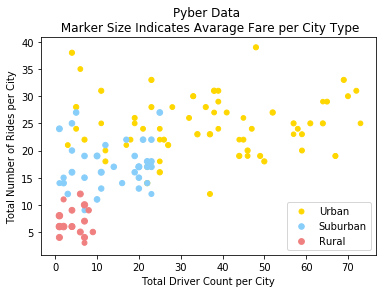

In [220]:
# Obtain the x and y coordinates for each of the three city types
plt.scatter(x_urban, y_urban, s=points_urban, color="gold", label="Urban")
plt.scatter(x_suburban, y_suburban, s=points_suburban, color="lightskyblue", label="Suburban")
plt.scatter(x_rural, y_rural, s=points_rural, color="lightcoral", label="Rural")

#cleaning and formatting data, also adding labels
plt.title("Pyber Data \n Marker Size Indicates Avarage Fare per City Type")
plt.ylabel("Total Number of Rides per City")
plt.xlabel("Total Driver Count per City")

plt.legend(loc = "best")

plt.savefig("PyberData.jpg")

In [214]:
#completing calculations for % of Total fares by ciry type, this total is for URBAN
urban_df.fare.sum()

39854.38

In [215]:
#Total for SUBURBAN
suburban_df.fare.sum()

19356.33

In [216]:
#Total for Rural
rural_df.fare.sum()

4327.929999999999

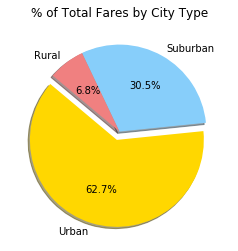

In [222]:
#Generated Pie chart for 
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [39854,19356,4328]

# The colors of each section of the pie chart
colors = ["gold" ,"lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)
     
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

plt.savefig("TotalFares.jpg")

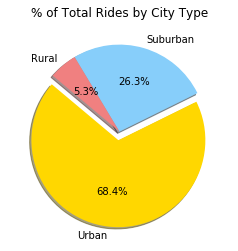

In [223]:
#Generated Pie chart for all three types lf cities 
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart (obtained these from previous calculations)
sizes = [1624,625,125]

# The colors of each section of the pie chart
colors = ["gold" ,"lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)
     
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

plt.savefig("TotalRides.jpg")

In [218]:
city_data_df.groupby("type").sum()

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


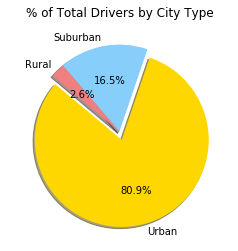

In [224]:
#Generated Pie chart for 
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [2405,490,78]

# The colors of each section of the pie chart
colors = ["gold" ,"lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)
     
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

plt.savefig("TotalDrivers.jpg")

In [ ]:


# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure